In [94]:
from google.colab import drive
import os
import zipfile
import shutil

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Dicoding/dataset-img/Archive.zip'
dataset_path = '/content/dataset/'
resized_dataset_path = '/content/dataset_resized_128x128/'  # Path dataset yang diresize

# 🔥 Hapus dataset hasil resize jika sudah ada sebelumnya
if os.path.exists(resized_dataset_path):
    shutil.rmtree(resized_dataset_path)  # Hapus folder dan isinya
    print(f"🔥 Folder {resized_dataset_path} telah dihapus untuk memastikan clean start.")

# 🔥 Hapus dataset lama jika ada
if os.path.exists(dataset_path):
    shutil.rmtree(dataset_path)  # Hapus folder dan isinya
    print(f"🔥 Folder {dataset_path} telah dihapus untuk memastikan clean start.")

# ✅ Ekstrak dataset baru
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# 🔥 Hapus folder yang tidak diinginkan (misalnya, __MACOSX atau folder _resized_)
unwanted_folders = ['__MACOSX'] + [f for f in os.listdir(dataset_path) if f.startswith('_resized_')]

for folder in unwanted_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  # Hapus folder dan isinya
        print(f"🔥 Folder {folder} telah dihapus.")

# ✅ Cek hasil akhir
print("✅ Dataset berhasil diekstrak ke:", dataset_path)
print("📂 Daftar folder dalam dataset setelah pembersihan:", os.listdir(dataset_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔥 Folder /content/dataset_resized_128x128/ telah dihapus untuk memastikan clean start.
🔥 Folder /content/dataset/ telah dihapus untuk memastikan clean start.
🔥 Folder __MACOSX telah dihapus.
✅ Dataset berhasil diekstrak ke: /content/dataset/
📂 Daftar folder dalam dataset setelah pembersihan: ['flowers', 'dogs', 'horses', 'human', 'cats']


In [95]:
# Dictionary untuk menyimpan jumlah gambar per kategori
class_counts = {}

# Loop ke setiap folder dalam dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Pastikan hanya membaca folder
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))  # Hitung jumlah file dalam kategori ini
        class_counts[category] = num_files

# Menampilkan hasil
total_images = sum(class_counts.values())  # Total semua gambar

print("Jumlah gambar per kategori:")
for category, count in class_counts.items():
    print(f"{category}: {count} images")

print(f"\nTotal jumlah gambar dalam dataset: {total_images} images")

Jumlah gambar per kategori:
flowers: 210 images
dogs: 202 images
horses: 202 images
human: 202 images
cats: 202 images

Total jumlah gambar dalam dataset: 1018 images


In [96]:
import cv2
import os

# Tentukan ukuran target untuk resize
target_size = (128, 128)  # (width, height)

# Pastikan dataset_path tidak memiliki slash di akhir
dataset_path = dataset_path.rstrip('/')  # Hapus "/" jika ada di akhir path

# Buat path folder untuk hasil resize
resized_dir = os.path.join(os.path.dirname(dataset_path), f"{os.path.basename(dataset_path)}_resized_{target_size[0]}x{target_size[1]}")

# Buat folder utama untuk dataset yang sudah diresize
os.makedirs(resized_dir, exist_ok=True)

# Loop setiap kategori gambar
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Cek apakah ini folder kategori
    if os.path.isdir(category_path):
        save_category_path = os.path.join(resized_dir, category)
        os.makedirs(save_category_path, exist_ok=True)  # Buat folder kategori jika belum ada

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Baca gambar

            if img is not None:
                img_resized = cv2.resize(img, target_size)  # Resize
                save_path = os.path.join(save_category_path, img_name)
                cv2.imwrite(save_path, img_resized)  # Simpan gambar yang sudah diresize

print(f"✅ Dataset berhasil diresize ke {target_size} dan disimpan di {resized_dir}")

✅ Dataset berhasil diresize ke (128, 128) dan disimpan di /content/dataset_resized_128x128


In [97]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Path dataset yang telah diresize
resized_dataset_path = "/content/dataset_resized_128x128"

# Path folder untuk train, validation, dan test
split_base_dir = "/content/dataset_split"
train_dir = os.path.join(split_base_dir, "train")
val_dir = os.path.join(split_base_dir, "val")
test_dir = os.path.join(split_base_dir, "test")

# Hapus folder sebelumnya jika ada (untuk clean start)
if os.path.exists(split_base_dir):
    shutil.rmtree(split_base_dir)
    print(f"🔥 Folder {split_base_dir} telah dihapus untuk memastikan clean start.")

# Buat folder utama untuk train, val, test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Rasio pembagian dataset
train_ratio = 0.8   # 80% untuk training
val_ratio = 0.1     # 10% untuk validation
test_ratio = 0.1    # 10% untuk testing

# Loop setiap kategori
for category in os.listdir(resized_dataset_path):
    category_path = os.path.join(resized_dataset_path, category)

    # Pastikan hanya membaca folder kategori
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)  # Acak urutan gambar

        # Hitung jumlah gambar untuk setiap set
        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)

        # Pisahkan dataset
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Buat folder kategori di dalam train, val, test
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # Copy gambar ke folder masing-masing
        for img_name in train_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(train_dir, category, img_name))

        for img_name in val_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(val_dir, category, img_name))

        for img_name in test_images:
            shutil.copy(os.path.join(category_path, img_name), os.path.join(test_dir, category, img_name))

        print(f"✅ Kategori {category}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

print("\n✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test Set!")
print("📂 Struktur folder setelah pembagian dataset:")
for split in ["train", "val", "test"]:
    split_path = os.path.join(split_base_dir, split)
    print(f"\n📁 {split.upper()} Set:")
    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        num_files = len(os.listdir(category_path))
        print(f"  - {category}: {num_files} images")

🔥 Folder /content/dataset_split telah dihapus untuk memastikan clean start.
✅ Kategori flowers: 168 train, 21 val, 21 test
✅ Kategori dogs: 161 train, 20 val, 21 test
✅ Kategori horses: 161 train, 20 val, 21 test
✅ Kategori human: 161 train, 20 val, 21 test
✅ Kategori cats: 161 train, 20 val, 21 test

✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test Set!
📂 Struktur folder setelah pembagian dataset:

📁 TRAIN Set:
  - flowers: 168 images
  - dogs: 161 images
  - horses: 161 images
  - human: 161 images
  - cats: 161 images

📁 VAL Set:
  - flowers: 21 images
  - dogs: 20 images
  - horses: 20 images
  - human: 20 images
  - cats: 20 images

📁 TEST Set:
  - flowers: 21 images
  - dogs: 21 images
  - horses: 21 images
  - human: 21 images
  - cats: 21 images


In [102]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [103]:
# Path ke dataset yang sudah dibagi
dataset_split_path = "/content/dataset_split"

train_dir = os.path.join(dataset_split_path, "train")
val_dir = os.path.join(dataset_split_path, "val")
test_dir = os.path.join(dataset_split_path, "test")

# Hyperparameters
img_size = (128, 128)  # Ukuran input gambar
batch_size = 32
learning_rate = 0.001

In [104]:
# Data Augmentation untuk Train Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotasi lebih agresif
    width_shift_range=0.3,  # Perpindahan horizontal lebih besar
    height_shift_range=0.3, # Perpindahan vertikal lebih besar
    shear_range=0.3,        # Distorsi bentuk lebih besar
    zoom_range=0.4,         # Zoom lebih agresif
    horizontal_flip=True,   # Flip horizontal
    brightness_range=[0.5, 1.5],  # Variasi kecerahan lebih besar
    fill_mode="nearest"
)

# Normalisasi untuk Validation & Test Set (tanpa augmentasi)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 812 images belonging to 5 classes.
Found 101 images belonging to 5 classes.
Found 105 images belonging to 5 classes.


In [109]:
model = Sequential([
    # Layer Convolution 1
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer Convolution 2
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer Convolution 3
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening
    Flatten(),

    # Fully Connected Layer 1 (Dense)
    Dense(128, activation="relu", kernel_regularizer=l2(0.01)),  # Regularisasi L2
    Dropout(0.6),  # Naikkan Dropout

    # Fully Connected Layer 2 (Output)
    Dense(5, activation="softmax")  # 5 kelas (flowers, dogs, horses, human, cats)
])



In [110]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Print Summary Model
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from tensorflow.keras.callbacks import Callback

class StopAtAccuracy(Callback):
    def __init__(self, target=0.85):
        super(StopAtAccuracy, self).__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target:
            print(f"\n🔥 Target tercapai! Val_accuracy: {val_acc:.4f} di epoch {epoch+1}. Mengecek test set...")

            # Evaluasi Test Set
            test_loss, test_acc = self.model.evaluate(test_generator, steps=len(test_generator), verbose=0)
            print(f"🔥 Test Accuracy setelah {epoch+1} epoch: {test_acc:.4f}")

            if test_acc >= self.target:
                print(f"✅ Test Accuracy juga sudah mencapai {test_acc:.4f}! Training dihentikan!")
                self.model.stop_training = True  # Hentikan training
            else:
                print(f"⚠️ Test Accuracy masih {test_acc:.4f}, training akan dilanjutkan!")

# Tambahkan callback
stop_at_accuracy = StopAtAccuracy(target=0.85)

# Training Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1000,  # Maksimum training bisa sampai 1000 epoch
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[stop_at_accuracy]  # Callback yang akan menghentikan training hanya jika test_accuracy juga ≥ 85%
)

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2092 - loss: 3.1948 - val_accuracy: 0.2079 - val_loss: 1.9816
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2279 - loss: 1.8634 - val_accuracy: 0.3564 - val_loss: 1.5970
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3661 - loss: 1.5366 - val_accuracy: 0.4356 - val_loss: 1.5272
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3671 - loss: 1.4950 - val_accuracy: 0.4851 - val_loss: 1.4675
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3965 - loss: 1.5066 - val_accuracy: 0.5248 - val_loss: 1.3978
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4399 - loss: 1.4557 - val_accuracy: 0.4950 - val_loss: 1.3984
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4294 - loss: 1.3906 - val_accuracy: 0.4752 - val_loss: 1.4967
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4568 - loss: 1.4164 - val_accuracy: 0.

KeyboardInterrupt: 

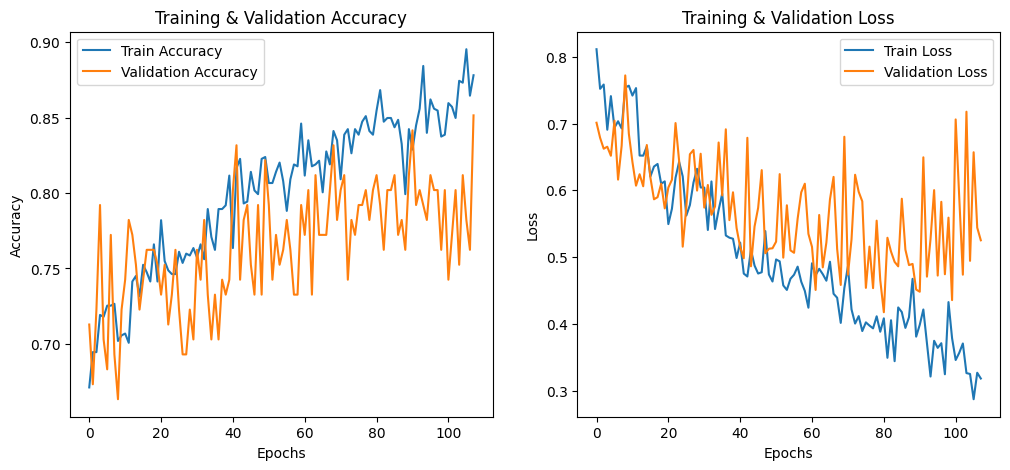

In [92]:
import matplotlib.pyplot as plt

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()

bawah ini bates.

In [32]:
import shutil
import random
from sklearn.model_selection import train_test_split

# Path dataset setelah resize
dataset_resized_path = resized_dir

# Path baru untuk Train, Validation, dan Test set
base_dir = "/content/split_dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Buat folder train, val, test untuk setiap kategori
for category in os.listdir(dataset_resized_path):
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Persentase split dataset
train_ratio = 0.7  # 70% data untuk training
val_ratio = 0.15   # 15% data untuk validation
test_ratio = 0.15  # 15% data untuk testing

# Loop setiap kategori untuk memindahkan file ke folder train, val, test
for category in os.listdir(dataset_resized_path):
    category_path = os.path.join(dataset_resized_path, category)
    images = os.listdir(category_path)

    if len(images) > 0:
        # Shuffle agar data acak
        random.shuffle(images)

        # Split dataset
        train_images, test_val_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_images, test_images = train_test_split(test_val_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Copy file ke masing-masing direktori
        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))
        for img in val_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(val_dir, category, img))
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test set.")

✅ Dataset berhasil dibagi menjadi Train, Validation, dan Test set.


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

Found 1012 images belonging to 9 classes.
Found 517 images belonging to 9 classes.


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Tentukan jumlah kelas berdasarkan kategori dalam dataset
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,846,533 (18.49 MB)

 Trainable params: 4,846,085 (18.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan training jika akurasi sudah mencapai 85%
early_stopping = EarlyStopping(
    monitor="accuracy",  # Bisa diganti dengan 'val_accuracy' jika ingin berdasarkan validation
    patience=20,         # Jika dalam 20 epoch tidak ada peningkatan, stop training
    verbose=1,
    mode="max",          # Karena kita ingin nilai maksimum dari 'accuracy'
    baseline=0.85,       # Target akurasi minimal
    restore_best_weights=True
)

# Training Model dengan max_epoch = 1000
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1000,  # Training bisa sampai 1000 epoch jika belum mencapai 85%
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping]  # Tambahkan Early Stopping Callback
)

Epoch 1/1000


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 18432, but received input with shape (None, 32768)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

ValueError: x and y must have same first dimension, but have shapes (20,) and (6,)

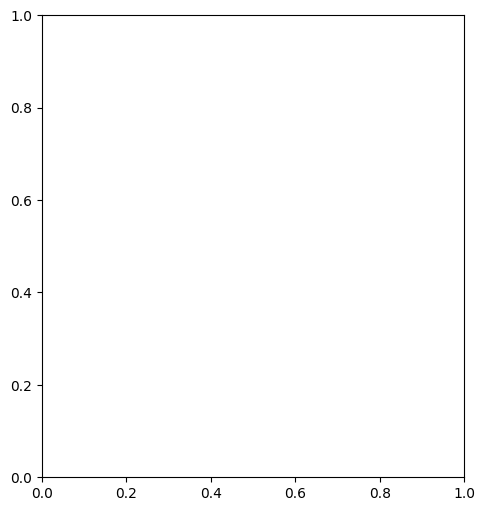

In [36]:
import matplotlib.pyplot as plt

# Plot hasil training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

In [15]:
import tensorflow as tf
!pip install tensorflowjs
import tensorflowjs as tfjs

# Buat struktur direktori yang sesuai
submission_dir = "/content/submission"
tfjs_dir = os.path.join(submission_dir, "tfjs_model")
tflite_dir = os.path.join(submission_dir, "tflite")
saved_model_dir = os.path.join(submission_dir, "saved_model")

# Pastikan semua folder dibuat
os.makedirs(tfjs_dir, exist_ok=True)
os.makedirs(tflite_dir, exist_ok=True)
os.makedirs(saved_model_dir, exist_ok=True)

# ✅ Simpan model dalam format SavedModel (.keras)
model.save(os.path.join(saved_model_dir, "saved_model.keras"))

# ✅ Simpan dalam format TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_path = os.path.join(tflite_dir, "model.tflite")
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

# Buat file label.txt untuk TFLite
label_path = os.path.join(tflite_dir, "label.txt")
with open(label_path, "w") as f:
    f.write("\n".join(["flowers", "dogs", "horses", "human", "cats"]))  # Sesuaikan dengan kategori dataset

# ✅ Simpan dalam format TensorFlow.js
tfjs.converters.save_keras_model(model, tfjs_dir)

print("✅ Model berhasil disimpan dalam format SavedModel, TF-Lite, dan TFJS di dalam folder 'submission'.")

Saved artifact at '/tmp/tmp4xvo78ad'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  134451204278416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204279376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204280720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204278032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204280144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204281488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204278800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204281872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204282256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134451204283792: TensorSpec(shape=(), dtype=tf.resource, name=None)


failed to lookup keras version from the file,
    this is likely a weight only file
✅ Model berhasil disimpan dalam format SavedModel, TF-Lite, dan TFJS di dalam folder 'submission'.
